In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=True)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=10000, random_state=1)

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x_train)
x_scaled = scaler.transform(x_train)
x_test_scaled= scaler.transform(x_test)


In [ ]:
from sklearn.linear_model import SGDClassifier 
model = SGDClassifier(loss="log")
model.fit(x_scaled, y_train)

SGDClassifier(loss='log')

In [ ]:
score=model.score(x_test_scaled, y_test)
print("Model Accuracy: ", score)

Model Accuracy:  0.8994


Confusion Matrix

In [ ]:
from sklearn import metrics

predictions = model.predict(x_test_scaled)

cm = metrics.confusion_matrix(y_test, predictions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Accuracy Score: 0.899')

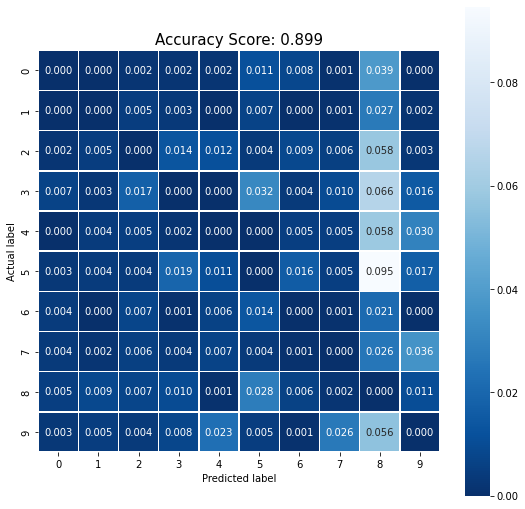

In [ ]:

plt.figure(figsize=(9,9))
np.fill_diagonal(cm_normalized,0)

sns.heatmap(cm_normalized,0, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(score) 
plt.title(all_sample_title, size = 15)

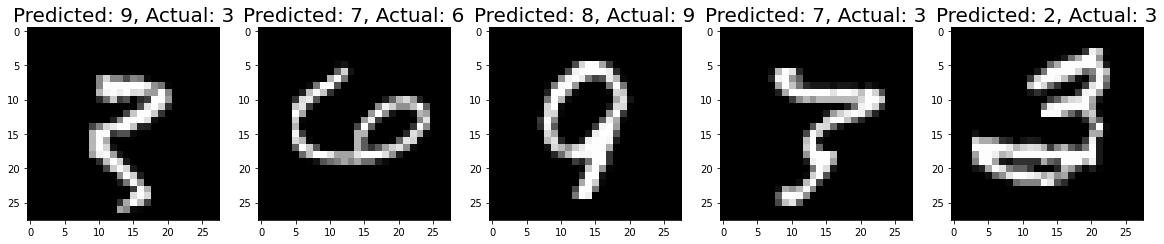

In [ ]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1


plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(pd.Series(misclassifiedIndexes).sample(5)):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test.values[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test.values[badIndex]), fontsize = 20)
